In [41]:
!pip install python-dateutil
# Displays figures in line
%matplotlib inline

# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import json
import locale
import datetime
#import gmaps
plt.style.use('ggplot')

from datetime import datetime
from pprint import pprint
from dateutil.parser import parse
#gmaps.configure(api_key=gkey)

distributed 1.21.8 requires msgpack, which is not installed.


In [39]:
#url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json"
url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&returnIdsOnly=true"

In [40]:
#loop through API dataset
response = requests.get(url)

resp_dict = json.loads(response.text)

objectIds = resp_dict["objectIds"]

objectId_count = len(objectIds)

#print(objectId_count)
  
crash_data = []  
count = 0
start = 0
end = 0
batch = 125

while count < objectId_count:

    end = end + batch
    url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds= "+ str(objectIds[start:end]).replace('[','').replace(']','')
    response_new = requests.get(url).json()
    start = end   
    count = count + batch 
    data = response_new['features']
    
    i = 0
    for x in data:
        crash_data.append(data[i]['attributes'])
        i = i + 1

In [62]:
#create dataframe from dataset
master_df = pd.DataFrame(crash_data)
master_df.head()

,ADDRESS,BICYCLISTSIMPAIRED,CCN,CRIMEID,DRIVERSIMPAIRED,EVENTID,FATAL_BICYCLIST,FATAL_DRIVER,FATAL_PEDESTRIAN,FROMDATE,...,TOTAL_GOVERNMENT,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,UNKNOWNINJURIES_BICYCLIST,UNKNOWNINJURIES_DRIVER,UNKNOWNINJURIES_PEDESTRIAN,WARD,XCOORD,YCOORD
0,3104 24TH STREET NE,0,18097652,27708510,0,{51B064C1-87D9-4868-B31C-7B0B71E40899},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,402381.744,140195.576
1,3691 22ND STREET SE,0,18097667,27708515,0,{5950C18A-0452-47DB-9146-E71DA9FDFCB8},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 8,402416.885,130683.528
2,300 MASSACHUSETTS AVENUE NE,0,18096364,27708607,0,{FDD73EC8-DFFC-4C1D-80D3-069E9BA0ED5C},0,0,0,1.528934e+12,...,0,0,0,0,0,0,0,Ward 6,399883.210,136326.730
3,2014 OTIS STREET NE,0,18097699,27708547,0,{D4D5E08C-3034-40FC-8BCF-A719D0390276},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,402173.886,140800.181
4,3725 12TH STREET NE,0,18097702,27708556,0,{19D892EF-ABF9-47F1-8476-3FD4E61183AD},0,0,0,1.529107e+12,...,0,0,0,3,0,0,0,Ward 5,400762.084,140839.124


In [63]:
#convert date format
master_df["FROMDATE"]=pd.to_datetime(master_df['FROMDATE'],unit='ms')
master_df["FROMDATE"].min()

Timestamp('1900-01-01 00:00:00')

In [64]:
#Create year column
master_df["YEAR"]=pd.DatetimeIndex(master_df["FROMDATE"]).year
master_df

,ADDRESS,BICYCLISTSIMPAIRED,CCN,CRIMEID,DRIVERSIMPAIRED,EVENTID,FATAL_BICYCLIST,FATAL_DRIVER,FATAL_PEDESTRIAN,FROMDATE,...,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,UNKNOWNINJURIES_BICYCLIST,UNKNOWNINJURIES_DRIVER,UNKNOWNINJURIES_PEDESTRIAN,WARD,XCOORD,YCOORD,YEAR
0,3104 24TH STREET NE,0,18097652,27708510,0,{51B064C1-87D9-4868-B31C-7B0B71E40899},0,0,0,2018-06-16,...,0,0,2,0,0,0,Ward 5,402381.744,140195.576,2018.0
1,3691 22ND STREET SE,0,18097667,27708515,0,{5950C18A-0452-47DB-9146-E71DA9FDFCB8},0,0,0,2018-06-16,...,0,0,2,0,0,0,Ward 8,402416.885,130683.528,2018.0
2,300 MASSACHUSETTS AVENUE NE,0,18096364,27708607,0,{FDD73EC8-DFFC-4C1D-80D3-069E9BA0ED5C},0,0,0,2018-06-14,...,0,0,0,0,0,0,Ward 6,399883.210,136326.730,2018.0
3,2014 OTIS STREET NE,0,18097699,27708547,0,{D4D5E08C-3034-40FC-8BCF-A719D0390276},0,0,0,2018-06-16,...,0,0,2,0,0,0,Ward 5,402173.886,140800.181,2018.0
4,3725 12TH STREET NE,0,18097702,27708556,0,{19D892EF-ABF9-47F1-8476-3FD4E61183AD},0,0,0,2018-06-16,...,0,0,3,0,0,0,Ward 5,400762.084,140839.124,2018.0
5,1630 7TH STREET NW,0,18097442,27707924,0,{7133F605-C77D-48B2-86BF-143FA577F6FD},0,0,0,2018-06-15,...,0,0,1,0,0,0,Ward 2,398072.763,138304.781,2018.0
6,1305 SAVANNAH STREET SE,0,18097741,27708594,0,{F4CFF90A-C2D3-40FC-AB0E-7D0E0706257C},0,0,0,2018-06-16,...,0,0,2,0,0,0,Ward 8,401066.001,130599.461,2018.0
7,1805 MONTANA AVENUE NE,0,18097737,27708603,0,{BF8786A5-005F-44D6-8A89-BE60DAED1D49},0,0,0,2018-06-16,...,0,0,2,0,0,0,Ward 5,401850.523,139072.201,2018.0
8,3827 PENNSYLVANIA AVENUE SE,0,18097748,27708608,0,{F9740465-9CDA-439A-A93E-3808092F7654},0,0,0,2018-06-16,...,0,0,3,0,0,0,Ward 7,404185.567,133067.086,2018.0
9,INTERSTATE 395 INTERSTATE BN,0,18097735,27708615,0,{E05A0BCB-9A5C-4EBA-808C-8AB75B0E8329},0,0,0,2018-06-15,...,0,0,3,0,0,0,Ward 2,398933.900,135111.310,2018.0


In [67]:
#Replace null values, and turn year into integer
master_df["YEAR"]=master_df["YEAR"].fillna(0)
master_df["YEAR"]=master_df["YEAR"].astype('int')
master_df.head()
master_df=total_crash

In [68]:
#Count total number of unique accidents for each year in the last 10 years
totalCount_2008 = total_crash.loc[total_crash["YEAR"]==2008].count()["CRIMEID"]
totalCount_2009 = total_crash.loc[total_crash["YEAR"]==2009].count()["CRIMEID"]
totalCount_2010 = total_crash.loc[total_crash["YEAR"]==2010].count()["CRIMEID"]
totalCount_2011 = total_crash.loc[total_crash["YEAR"]==2011].count()["CRIMEID"]
totalCount_2012 = total_crash.loc[total_crash["YEAR"]==2012].count()["CRIMEID"]
totalCount_2013 = total_crash.loc[total_crash["YEAR"]==2013].count()["CRIMEID"]
totalCount_2014 = total_crash.loc[total_crash["YEAR"]==2014].count()["CRIMEID"]
totalCount_2015 = total_crash.loc[total_crash["YEAR"]==2015].count()["CRIMEID"]
totalCount_2016 = total_crash.loc[total_crash["YEAR"]==2016].count()["CRIMEID"]
totalCount_2017 = total_crash.loc[total_crash["YEAR"]==2017].count()["CRIMEID"]
totalCount_2018 = total_crash.loc[total_crash["YEAR"]==2018].count()["CRIMEID"]

#print(totalCount_2017)

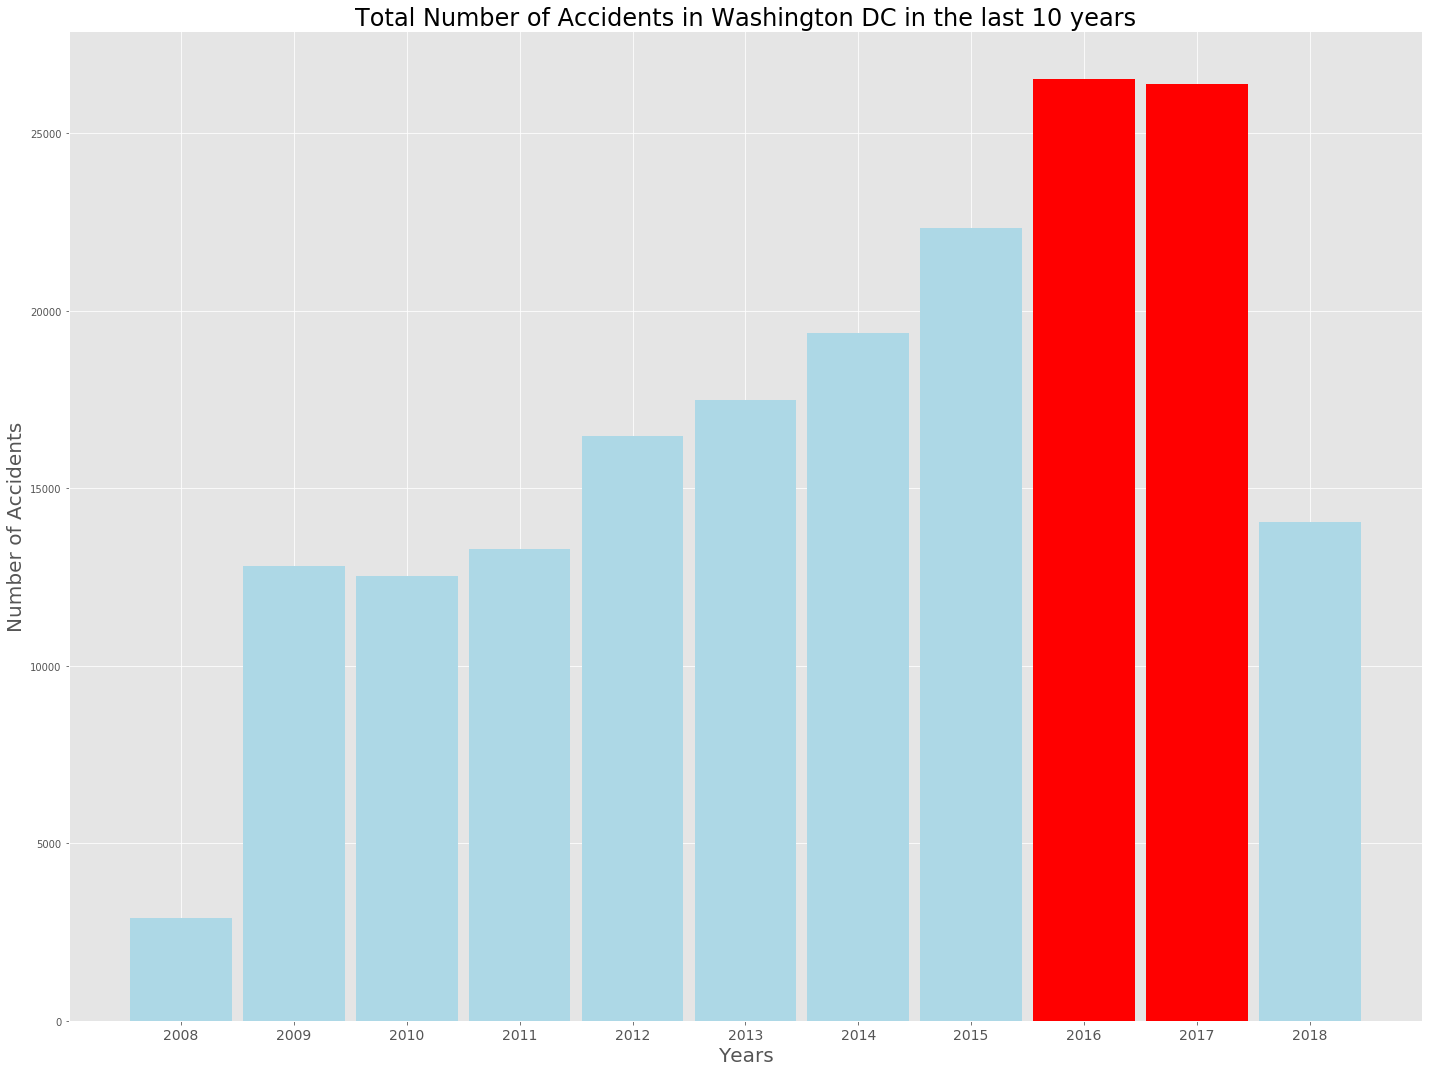

In [69]:
#Bar chart: Total number of accidents in the last 10 years
years = [totalCount_2008, totalCount_2009, totalCount_2010, totalCount_2011, totalCount_2012, totalCount_2013, totalCount_2014, 
         totalCount_2015, totalCount_2016, totalCount_2017,totalCount_2018]
colors = ["lightblue", "lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","red","red","lightblue"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
xAxis = np.arange(len(years))
tickLocations = [value for value in xAxis]
plt.xticks(tickLocations, ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016","2017","2018"], rotation="0", fontsize=14)
plt.bar(xAxis, years, align="center", color=colors, width=.9)
plt.title("Total Number of Accidents in Washington DC in the last 10 years", fontsize=24)
plt.ylabel("Number of Accidents", fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.tight_layout()
plt.savefig("Total Accidents in last 10 yrs.png")
plt.show()


In [70]:
#Types of accidents per year
year_2008 = total_crash.loc[total_crash["YEAR"]==2008]
year_2009 = total_crash.loc[total_crash["YEAR"]==2009]
year_2010 = total_crash.loc[total_crash["YEAR"]==2010]
year_2011 = total_crash.loc[total_crash["YEAR"]==2011]
year_2012 = total_crash.loc[total_crash["YEAR"]==2012]
year_2013 = total_crash.loc[total_crash["YEAR"]==2013]
year_2014 = total_crash.loc[total_crash["YEAR"]==2014]
year_2015 = total_crash.loc[total_crash["YEAR"]==2015]
year_2016 = total_crash.loc[total_crash["YEAR"]==2016]
year_2017 = total_crash.loc[total_crash["YEAR"]==2017]
year_2018 = total_crash.loc[total_crash["YEAR"]==2018]
#year_2018["TOTAL_BICYCLES"]

#bikes
year_2008_bikes = year_2008.loc[year_2008["TOTAL_BICYCLES"]>=1]
year_2009_bikes = year_2009.loc[year_2009["TOTAL_BICYCLES"]>=1]
year_2010_bikes = year_2010.loc[year_2010["TOTAL_BICYCLES"]>=1]
year_2011_bikes = year_2011.loc[year_2011["TOTAL_BICYCLES"]>=1]
year_2012_bikes = year_2012.loc[year_2012["TOTAL_BICYCLES"]>=1]
year_2013_bikes = year_2013.loc[year_2013["TOTAL_BICYCLES"]>=1]
year_2014_bikes = year_2014.loc[year_2014["TOTAL_BICYCLES"]>=1]
year_2015_bikes = year_2015.loc[year_2015["TOTAL_BICYCLES"]>=1]
year_2016_bikes = year_2016.loc[year_2016["TOTAL_BICYCLES"]>=1]
year_2017_bikes = year_2017.loc[year_2017["TOTAL_BICYCLES"]>=1]
year_2018_bikes = year_2018.loc[year_2018["TOTAL_BICYCLES"]>=1]

#y axis for bikes
sum_year_2008_bikes=year_2008_bikes["TOTAL_BICYCLES"].sum()
sum_year_2009_bikes=year_2009_bikes["TOTAL_BICYCLES"].sum()
sum_year_2010_bikes=year_2010_bikes["TOTAL_BICYCLES"].sum()
sum_year_2011_bikes=year_2011_bikes["TOTAL_BICYCLES"].sum()
sum_year_2012_bikes=year_2012_bikes["TOTAL_BICYCLES"].sum()
sum_year_2013_bikes=year_2013_bikes["TOTAL_BICYCLES"].sum()
sum_year_2014_bikes=year_2014_bikes["TOTAL_BICYCLES"].sum()
sum_year_2015_bikes=year_2015_bikes["TOTAL_BICYCLES"].sum()
sum_year_2016_bikes=year_2016_bikes["TOTAL_BICYCLES"].sum()
sum_year_2017_bikes=year_2017_bikes["TOTAL_BICYCLES"].sum()
sum_year_2018_bikes=year_2018_bikes["TOTAL_BICYCLES"].sum()

#vehicles
year_2008_vehicles = year_2008.loc[year_2008["TOTAL_VEHICLES"]>=1]
year_2009_vehicles = year_2009.loc[year_2009["TOTAL_VEHICLES"]>=1]
year_2010_vehicles = year_2010.loc[year_2010["TOTAL_VEHICLES"]>=1]
year_2011_vehicles = year_2011.loc[year_2011["TOTAL_VEHICLES"]>=1]
year_2012_vehicles = year_2012.loc[year_2012["TOTAL_VEHICLES"]>=1]
year_2013_vehicles = year_2013.loc[year_2013["TOTAL_VEHICLES"]>=1]
year_2014_vehicles = year_2014.loc[year_2014["TOTAL_VEHICLES"]>=1]
year_2015_vehicles = year_2015.loc[year_2015["TOTAL_VEHICLES"]>=1]
year_2016_vehicles = year_2016.loc[year_2016["TOTAL_VEHICLES"]>=1]
year_2017_vehicles = year_2017.loc[year_2017["TOTAL_VEHICLES"]>=1]
year_2018_vehicles = year_2018.loc[year_2018["TOTAL_VEHICLES"]>=1]

#y axis for VEHICLES
sum_year_2008_vehicles=year_2008_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2009_vehicles=year_2009_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2010_vehicles=year_2010_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2011_vehicles=year_2011_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2012_vehicles=year_2012_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2013_vehicles=year_2013_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2014_vehicles=year_2014_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2015_vehicles=year_2015_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2016_vehicles=year_2016_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2017_vehicles=year_2017_vehicles["TOTAL_VEHICLES"].sum()
sum_year_2018_vehicles=year_2018_vehicles["TOTAL_VEHICLES"].sum()

#PEDESTRIAN
year_2008_pedestrians = year_2008.loc[year_2008["TOTAL_PEDESTRIANS"]>=1]
year_2009_pedestrians = year_2009.loc[year_2009["TOTAL_PEDESTRIANS"]>=1]
year_2010_pedestrians = year_2010.loc[year_2010["TOTAL_PEDESTRIANS"]>=1]
year_2011_pedestrians = year_2011.loc[year_2011["TOTAL_PEDESTRIANS"]>=1]
year_2012_pedestrians = year_2012.loc[year_2012["TOTAL_PEDESTRIANS"]>=1]
year_2013_pedestrians = year_2013.loc[year_2013["TOTAL_PEDESTRIANS"]>=1]
year_2014_pedestrians = year_2014.loc[year_2014["TOTAL_PEDESTRIANS"]>=1]
year_2015_pedestrians = year_2015.loc[year_2015["TOTAL_PEDESTRIANS"]>=1]
year_2016_pedestrians = year_2016.loc[year_2016["TOTAL_PEDESTRIANS"]>=1]
year_2017_pedestrians = year_2017.loc[year_2017["TOTAL_PEDESTRIANS"]>=1]
year_2018_pedestrians = year_2018.loc[year_2018["TOTAL_PEDESTRIANS"]>=1]

#y axis for PEDESTRIAN
sum_year_2008_pedestrians=year_2008_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2009_pedestrians=year_2009_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2010_pedestrians=year_2010_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2011_pedestrians=year_2011_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2012_pedestrians=year_2012_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2013_pedestrians=year_2013_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2014_pedestrians=year_2014_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2015_pedestrians=year_2015_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2016_pedestrians=year_2016_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2017_pedestrians=year_2017_pedestrians["TOTAL_PEDESTRIANS"].sum()
sum_year_2018_pedestrians=year_2018_pedestrians["TOTAL_PEDESTRIANS"].sum()

#TAXIS
year_2008_taxis = year_2008.loc[year_2008["TOTAL_TAXIS"]>=1]
year_2009_taxis = year_2009.loc[year_2009["TOTAL_TAXIS"]>=1]
year_2010_taxis = year_2010.loc[year_2010["TOTAL_TAXIS"]>=1]
year_2011_taxis = year_2011.loc[year_2011["TOTAL_TAXIS"]>=1]
year_2012_taxis = year_2012.loc[year_2012["TOTAL_TAXIS"]>=1]
year_2013_taxis = year_2013.loc[year_2013["TOTAL_TAXIS"]>=1]
year_2014_taxis = year_2014.loc[year_2014["TOTAL_TAXIS"]>=1]
year_2015_taxis = year_2015.loc[year_2015["TOTAL_TAXIS"]>=1]
year_2016_taxis = year_2016.loc[year_2016["TOTAL_TAXIS"]>=1]
year_2017_taxis = year_2017.loc[year_2017["TOTAL_TAXIS"]>=1]
year_2018_taxis = year_2018.loc[year_2018["TOTAL_TAXIS"]>=1]

#y axis for TAXIS
sum_year_2008_taxis=year_2008_taxis["TOTAL_TAXIS"].sum()
sum_year_2009_taxis=year_2009_taxis["TOTAL_TAXIS"].sum()
sum_year_2010_taxis=year_2010_taxis["TOTAL_TAXIS"].sum()
sum_year_2011_taxis=year_2011_taxis["TOTAL_TAXIS"].sum()
sum_year_2012_taxis=year_2012_taxis["TOTAL_TAXIS"].sum()
sum_year_2013_taxis=year_2013_taxis["TOTAL_TAXIS"].sum()
sum_year_2014_taxis=year_2014_taxis["TOTAL_TAXIS"].sum()
sum_year_2015_taxis=year_2015_taxis["TOTAL_TAXIS"].sum()
sum_year_2016_taxis=year_2016_taxis["TOTAL_TAXIS"].sum()
sum_year_2017_taxis=year_2017_taxis["TOTAL_TAXIS"].sum()
sum_year_2018_taxis=year_2018_taxis["TOTAL_TAXIS"].sum()


#GOVERNMENT
year_2008_government = year_2008.loc[year_2008["TOTAL_GOVERNMENT"]>=1]
year_2009_government = year_2009.loc[year_2009["TOTAL_GOVERNMENT"]>=1]
year_2010_government = year_2010.loc[year_2010["TOTAL_GOVERNMENT"]>=1]
year_2011_government = year_2011.loc[year_2011["TOTAL_GOVERNMENT"]>=1]
year_2012_government = year_2012.loc[year_2012["TOTAL_GOVERNMENT"]>=1]
year_2013_government = year_2013.loc[year_2013["TOTAL_GOVERNMENT"]>=1]
year_2014_government = year_2014.loc[year_2014["TOTAL_GOVERNMENT"]>=1]
year_2015_government = year_2015.loc[year_2015["TOTAL_GOVERNMENT"]>=1]
year_2016_government = year_2016.loc[year_2016["TOTAL_GOVERNMENT"]>=1]
year_2017_government = year_2017.loc[year_2017["TOTAL_GOVERNMENT"]>=1]
year_2018_government = year_2018.loc[year_2018["TOTAL_GOVERNMENT"]>=1]

#y axis for GOVERNMENT
sum_year_2008_government=year_2008_government["TOTAL_GOVERNMENT"].sum()
sum_year_2009_government=year_2009_government["TOTAL_GOVERNMENT"].sum()
sum_year_2010_government=year_2010_government["TOTAL_GOVERNMENT"].sum()
sum_year_2011_government=year_2011_government["TOTAL_GOVERNMENT"].sum()
sum_year_2012_government=year_2012_government["TOTAL_GOVERNMENT"].sum()
sum_year_2013_government=year_2013_government["TOTAL_GOVERNMENT"].sum()
sum_year_2014_government=year_2014_government["TOTAL_GOVERNMENT"].sum()
sum_year_2015_government=year_2015_government["TOTAL_GOVERNMENT"].sum()
sum_year_2016_government=year_2016_government["TOTAL_GOVERNMENT"].sum()
sum_year_2017_government=year_2017_government["TOTAL_GOVERNMENT"].sum()
sum_year_2018_government=year_2018_government["TOTAL_GOVERNMENT"].sum()


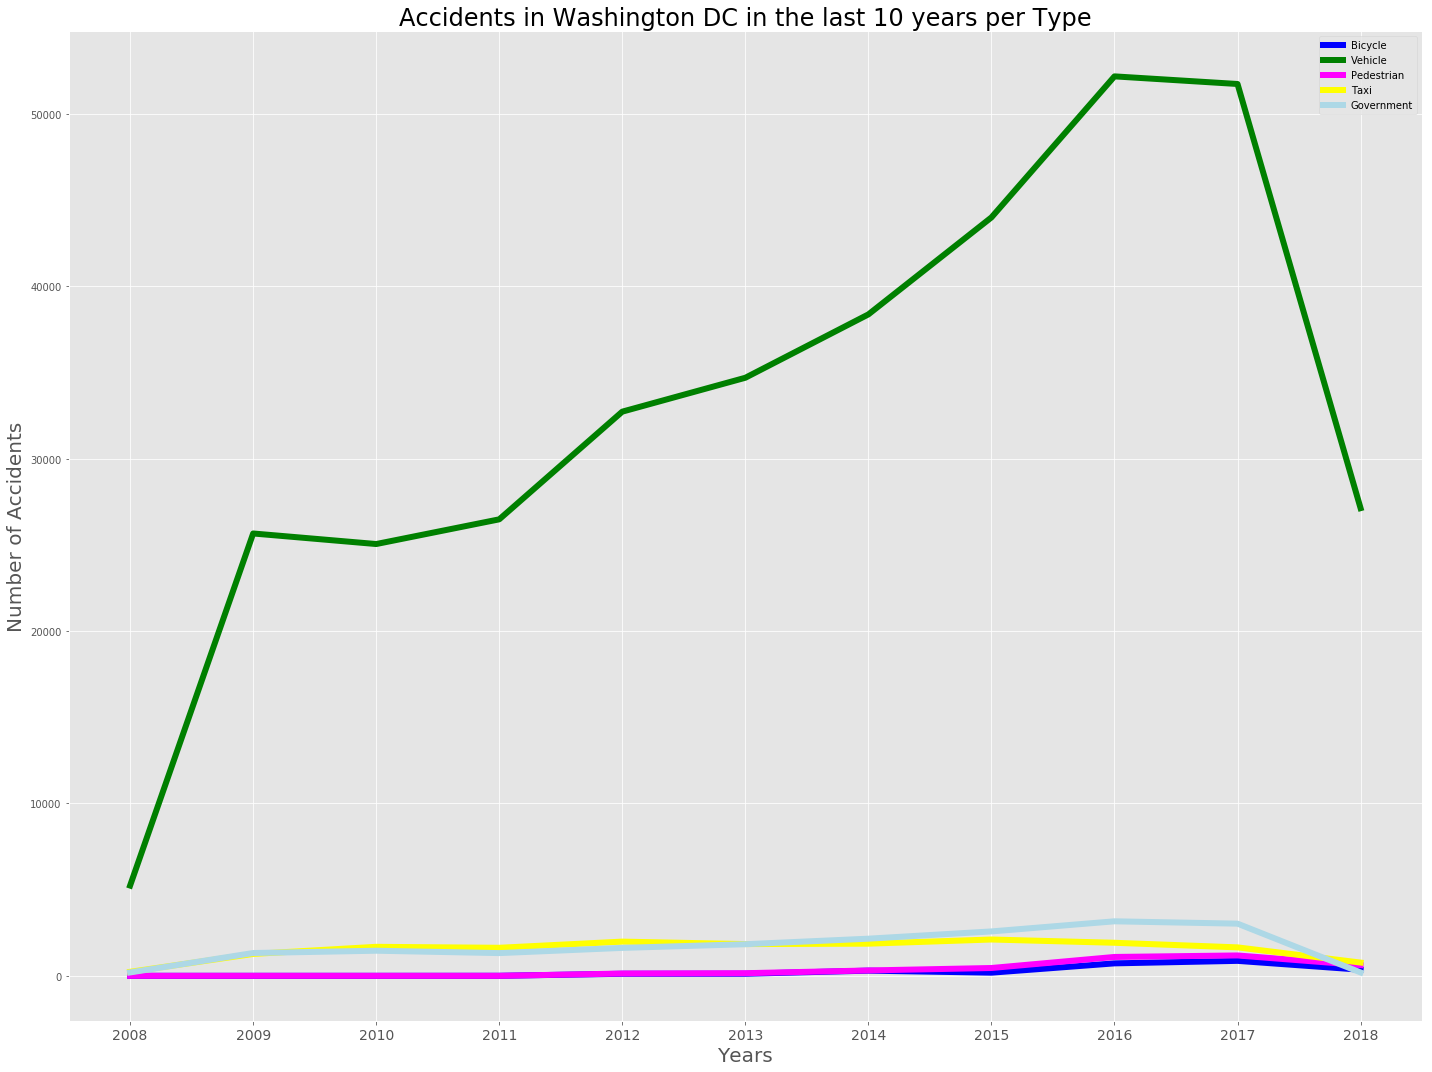

In [71]:
#Line chart: Type of accidents in the last 10 years
years = [year_2008, year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018]
bikes = [sum_year_2008_bikes,sum_year_2009_bikes,sum_year_2010_bikes,sum_year_2011_bikes,sum_year_2012_bikes,sum_year_2013_bikes,
        sum_year_2014_bikes,sum_year_2015_bikes,sum_year_2016_bikes,sum_year_2017_bikes,sum_year_2018_bikes]
vehicles = [sum_year_2008_vehicles,sum_year_2009_vehicles,sum_year_2010_vehicles,sum_year_2011_vehicles,sum_year_2012_vehicles,
            sum_year_2013_vehicles,sum_year_2014_vehicles,sum_year_2015_vehicles,sum_year_2016_vehicles,sum_year_2017_vehicles,
            sum_year_2018_vehicles]
pedestrian = [sum_year_2008_pedestrians, sum_year_2009_pedestrians,sum_year_2010_pedestrians,sum_year_2011_pedestrians,
              sum_year_2012_pedestrians,sum_year_2013_pedestrians,sum_year_2014_pedestrians,sum_year_2015_pedestrians,
              sum_year_2016_pedestrians,sum_year_2017_pedestrians,sum_year_2018_pedestrians]
taxi = [sum_year_2008_taxis,sum_year_2009_taxis,sum_year_2010_taxis,sum_year_2011_taxis,sum_year_2012_taxis,sum_year_2013_taxis,
       sum_year_2014_taxis,sum_year_2015_taxis,sum_year_2016_taxis,sum_year_2017_taxis,sum_year_2018_taxis]
govt = [sum_year_2008_government, sum_year_2009_government,sum_year_2010_government,sum_year_2011_government,
        sum_year_2012_government,sum_year_2013_government,sum_year_2014_government,sum_year_2015_government,sum_year_2016_government,sum_year_2017_government,
       sum_year_2008_government]


# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
xAxis = np.arange(len(years))
tickLocations = [value for value in xAxis]
plt.xticks(tickLocations, ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016","2017","2018"], rotation="0", fontsize=14)
plt.plot(xAxis, bikes, color="blue", label="Bicycle", linewidth=6)
plt.plot(xAxis, vehicles, color="green", label="Vehicle", linewidth=6)
plt.plot(xAxis, pedestrian, color="magenta", label="Pedestrian", linewidth=6)
plt.plot(xAxis, taxi, color="yellow", label="Taxi", linewidth=6)
plt.plot(xAxis, govt, color="lightblue", label="Government", linewidth=6)

plt.title("Accidents in Washington DC in the last 10 years per Type", fontsize=24)
plt.ylabel("Number of Accidents", fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("Accidents in last 10 yrs per type.png")
plt.show()

In [72]:
# Create dataframes for each ward containing all DC crash data
ward1DF = master_df.loc[master_df["WARD"]== "Ward 1"]
ward2DF = master_df.loc[master_df["WARD"]== "Ward 2"]
ward3DF = master_df.loc[master_df["WARD"]== "Ward 3"]
ward4DF = master_df.loc[master_df["WARD"]== "Ward 4"]
ward5DF = master_df.loc[master_df["WARD"]== "Ward 5"]
ward6DF = master_df.loc[master_df["WARD"]== "Ward 6"]
ward7DF = master_df.loc[master_df["WARD"]== "Ward 7"]
ward8DF = master_df.loc[master_df["WARD"]== "Ward 8"]

#ward1 per year
ward1_2008 = ward1DF.loc[ward1DF["YEAR"]==2008].count()["CRIMEID"]
ward1_2009 = ward1DF.loc[ward1DF["YEAR"]==2009].count()["CRIMEID"]
ward1_2010 = ward1DF.loc[ward1DF["YEAR"]==2010].count()["CRIMEID"]
ward1_2011 = ward1DF.loc[ward1DF["YEAR"]==2011].count()["CRIMEID"]
ward1_2012 = ward1DF.loc[ward1DF["YEAR"]==2012].count()["CRIMEID"]
ward1_2013 = ward1DF.loc[ward1DF["YEAR"]==2013].count()["CRIMEID"]
ward1_2014 = ward1DF.loc[ward1DF["YEAR"]==2014].count()["CRIMEID"]
ward1_2015 = ward1DF.loc[ward1DF["YEAR"]==2015].count()["CRIMEID"]
ward1_2016 = ward1DF.loc[ward1DF["YEAR"]==2016].count()["CRIMEID"]
ward1_2017 = ward1DF.loc[ward1DF["YEAR"]==2017].count()["CRIMEID"]
ward1_2018 = ward1DF.loc[ward1DF["YEAR"]==2018].count()["CRIMEID"]

#ward2 per year
ward2_2008 = ward2DF.loc[ward2DF["YEAR"]==2008].count()["CRIMEID"]
ward2_2009 = ward2DF.loc[ward2DF["YEAR"]==2009].count()["CRIMEID"]
ward2_2010 = ward2DF.loc[ward2DF["YEAR"]==2010].count()["CRIMEID"]
ward2_2011 = ward2DF.loc[ward2DF["YEAR"]==2011].count()["CRIMEID"]
ward2_2012 = ward2DF.loc[ward2DF["YEAR"]==2012].count()["CRIMEID"]
ward2_2013 = ward2DF.loc[ward2DF["YEAR"]==2013].count()["CRIMEID"]
ward2_2014 = ward2DF.loc[ward2DF["YEAR"]==2014].count()["CRIMEID"]
ward2_2015 = ward2DF.loc[ward2DF["YEAR"]==2015].count()["CRIMEID"]
ward2_2016 = ward2DF.loc[ward2DF["YEAR"]==2016].count()["CRIMEID"]
ward2_2017 = ward2DF.loc[ward2DF["YEAR"]==2017].count()["CRIMEID"]
ward2_2018 = ward2DF.loc[ward2DF["YEAR"]==2018].count()["CRIMEID"]

#ward3 per year
ward3_2008 = ward3DF.loc[ward3DF["YEAR"]==2008].count()["CRIMEID"]
ward3_2009 = ward3DF.loc[ward3DF["YEAR"]==2009].count()["CRIMEID"]
ward3_2010 = ward3DF.loc[ward3DF["YEAR"]==2010].count()["CRIMEID"]
ward3_2011 = ward3DF.loc[ward3DF["YEAR"]==2011].count()["CRIMEID"]
ward3_2012 = ward3DF.loc[ward3DF["YEAR"]==2012].count()["CRIMEID"]
ward3_2013 = ward3DF.loc[ward3DF["YEAR"]==2013].count()["CRIMEID"]
ward3_2014 = ward3DF.loc[ward3DF["YEAR"]==2014].count()["CRIMEID"]
ward3_2015 = ward3DF.loc[ward3DF["YEAR"]==2015].count()["CRIMEID"]
ward3_2016 = ward3DF.loc[ward3DF["YEAR"]==2016].count()["CRIMEID"]
ward3_2017 = ward3DF.loc[ward3DF["YEAR"]==2017].count()["CRIMEID"]
ward3_2018 = ward3DF.loc[ward3DF["YEAR"]==2018].count()["CRIMEID"]

#ward4 per year
ward4_2008 = ward4DF.loc[ward4DF["YEAR"]==2008].count()["CRIMEID"]
ward4_2009 = ward4DF.loc[ward4DF["YEAR"]==2009].count()["CRIMEID"]
ward4_2010 = ward4DF.loc[ward4DF["YEAR"]==2010].count()["CRIMEID"]
ward4_2011 = ward4DF.loc[ward4DF["YEAR"]==2011].count()["CRIMEID"]
ward4_2012 = ward4DF.loc[ward4DF["YEAR"]==2012].count()["CRIMEID"]
ward4_2013 = ward4DF.loc[ward4DF["YEAR"]==2013].count()["CRIMEID"]
ward4_2014 = ward4DF.loc[ward4DF["YEAR"]==2014].count()["CRIMEID"]
ward4_2015 = ward4DF.loc[ward4DF["YEAR"]==2015].count()["CRIMEID"]
ward4_2016 = ward4DF.loc[ward4DF["YEAR"]==2016].count()["CRIMEID"]
ward4_2017 = ward4DF.loc[ward4DF["YEAR"]==2017].count()["CRIMEID"]
ward4_2018 = ward4DF.loc[ward4DF["YEAR"]==2018].count()["CRIMEID"]

#ward5 per year
ward5_2008 = ward5DF.loc[ward5DF["YEAR"]==2008].count()["CRIMEID"]
ward5_2009 = ward5DF.loc[ward5DF["YEAR"]==2009].count()["CRIMEID"]
ward5_2010 = ward5DF.loc[ward5DF["YEAR"]==2010].count()["CRIMEID"]
ward5_2011 = ward5DF.loc[ward5DF["YEAR"]==2011].count()["CRIMEID"]
ward5_2012 = ward5DF.loc[ward5DF["YEAR"]==2012].count()["CRIMEID"]
ward5_2013 = ward5DF.loc[ward5DF["YEAR"]==2013].count()["CRIMEID"]
ward5_2014 = ward5DF.loc[ward5DF["YEAR"]==2014].count()["CRIMEID"]
ward5_2015 = ward5DF.loc[ward5DF["YEAR"]==2015].count()["CRIMEID"]
ward5_2016 = ward5DF.loc[ward5DF["YEAR"]==2016].count()["CRIMEID"]
ward5_2017 = ward5DF.loc[ward5DF["YEAR"]==2017].count()["CRIMEID"]
ward5_2018 = ward5DF.loc[ward5DF["YEAR"]==2018].count()["CRIMEID"]

#ward6 per year
ward6_2008 = ward6DF.loc[ward6DF["YEAR"]==2008].count()["CRIMEID"]
ward6_2009 = ward6DF.loc[ward6DF["YEAR"]==2009].count()["CRIMEID"]
ward6_2010 = ward6DF.loc[ward6DF["YEAR"]==2010].count()["CRIMEID"]
ward6_2011 = ward6DF.loc[ward6DF["YEAR"]==2011].count()["CRIMEID"]
ward6_2012 = ward6DF.loc[ward6DF["YEAR"]==2012].count()["CRIMEID"]
ward6_2013 = ward6DF.loc[ward6DF["YEAR"]==2013].count()["CRIMEID"]
ward6_2014 = ward6DF.loc[ward6DF["YEAR"]==2014].count()["CRIMEID"]
ward6_2015 = ward6DF.loc[ward6DF["YEAR"]==2015].count()["CRIMEID"]
ward6_2016 = ward6DF.loc[ward6DF["YEAR"]==2016].count()["CRIMEID"]
ward6_2017 = ward6DF.loc[ward6DF["YEAR"]==2017].count()["CRIMEID"]
ward6_2018 = ward6DF.loc[ward6DF["YEAR"]==2018].count()["CRIMEID"]

#ward7 per year
ward7_2008 = ward7DF.loc[ward7DF["YEAR"]==2008].count()["CRIMEID"]
ward7_2009 = ward7DF.loc[ward7DF["YEAR"]==2009].count()["CRIMEID"]
ward7_2010 = ward7DF.loc[ward7DF["YEAR"]==2010].count()["CRIMEID"]
ward7_2011 = ward7DF.loc[ward7DF["YEAR"]==2011].count()["CRIMEID"]
ward7_2012 = ward7DF.loc[ward7DF["YEAR"]==2012].count()["CRIMEID"]
ward7_2013 = ward7DF.loc[ward7DF["YEAR"]==2013].count()["CRIMEID"]
ward7_2014 = ward7DF.loc[ward7DF["YEAR"]==2014].count()["CRIMEID"]
ward7_2015 = ward7DF.loc[ward7DF["YEAR"]==2015].count()["CRIMEID"]
ward7_2016 = ward7DF.loc[ward7DF["YEAR"]==2016].count()["CRIMEID"]
ward7_2017 = ward7DF.loc[ward7DF["YEAR"]==2017].count()["CRIMEID"]
ward7_2018 = ward7DF.loc[ward7DF["YEAR"]==2018].count()["CRIMEID"]

#ward8 per year
ward8_2008 = ward8DF.loc[ward8DF["YEAR"]==2008].count()["CRIMEID"]
ward8_2009 = ward8DF.loc[ward8DF["YEAR"]==2009].count()["CRIMEID"]
ward8_2010 = ward8DF.loc[ward8DF["YEAR"]==2010].count()["CRIMEID"]
ward8_2011 = ward8DF.loc[ward8DF["YEAR"]==2011].count()["CRIMEID"]
ward8_2012 = ward8DF.loc[ward8DF["YEAR"]==2012].count()["CRIMEID"]
ward8_2013 = ward8DF.loc[ward8DF["YEAR"]==2013].count()["CRIMEID"]
ward8_2014 = ward8DF.loc[ward8DF["YEAR"]==2014].count()["CRIMEID"]
ward8_2015 = ward8DF.loc[ward8DF["YEAR"]==2015].count()["CRIMEID"]
ward8_2016 = ward8DF.loc[ward8DF["YEAR"]==2016].count()["CRIMEID"]
ward8_2017 = ward8DF.loc[ward8DF["YEAR"]==2017].count()["CRIMEID"]
ward8_2018 = ward8DF.loc[ward8DF["YEAR"]==2018].count()["CRIMEID"]


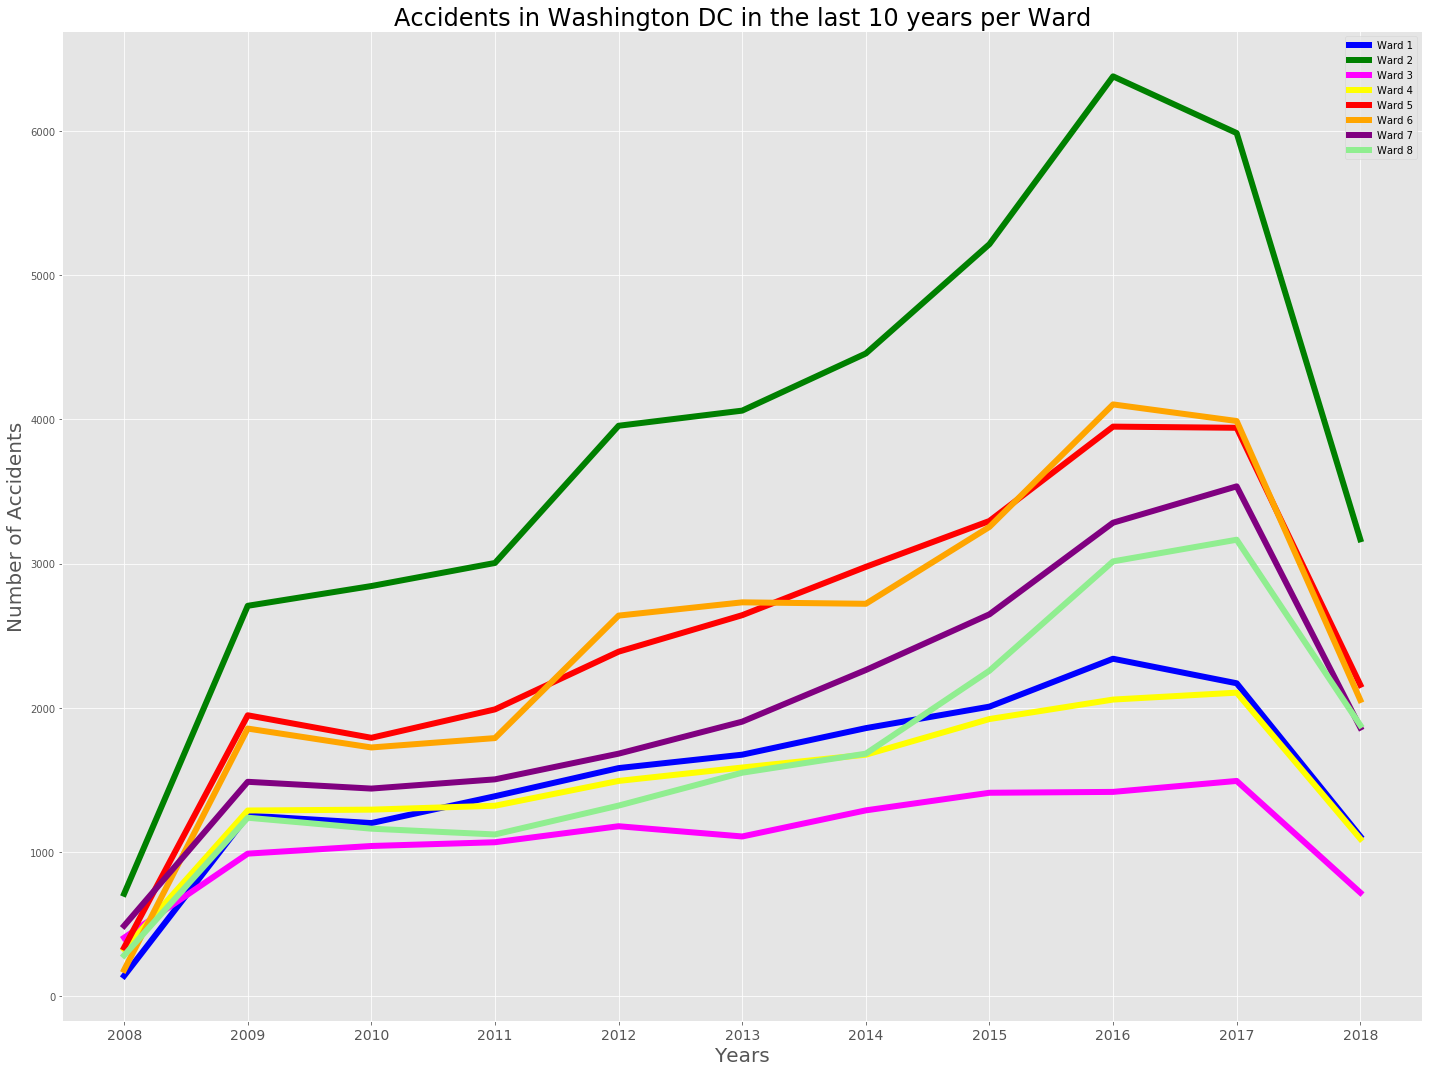

In [73]:
#Line chart: # of accidents per ward in the last 10 years
years = [year_2008, year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018]

ward1 = [ward1_2008, ward1_2009, ward1_2010, ward1_2011, ward1_2012, ward1_2013, ward1_2014, ward1_2015,ward1_2016,
        ward1_2017,ward1_2018]
ward2 = [ward2_2008, ward2_2009, ward2_2010, ward2_2011, ward2_2012, ward2_2013, ward2_2014, ward2_2015,ward2_2016,
        ward2_2017,ward2_2018]
ward3 = [ward3_2008, ward3_2009, ward3_2010, ward3_2011, ward3_2012, ward3_2013, ward3_2014, ward3_2015,ward3_2016,
        ward3_2017,ward3_2018]
ward4 = [ward4_2008, ward4_2009, ward4_2010, ward4_2011, ward4_2012, ward4_2013, ward4_2014, ward4_2015,ward4_2016,
        ward4_2017,ward4_2018]
ward5 = [ward5_2008, ward5_2009, ward5_2010, ward5_2011, ward5_2012, ward5_2013, ward5_2014, ward5_2015,ward5_2016,
        ward5_2017,ward5_2018]
ward6= [ward6_2008, ward6_2009, ward6_2010, ward6_2011, ward6_2012, ward6_2013, ward6_2014, ward6_2015,ward6_2016,
        ward6_2017,ward6_2018]
ward7= [ward7_2008, ward7_2009, ward7_2010, ward7_2011, ward7_2012, ward7_2013, ward7_2014, ward7_2015,ward7_2016,
        ward7_2017,ward7_2018]
ward8 = [ward8_2008, ward8_2009, ward8_2010, ward8_2011, ward8_2012, ward8_2013, ward8_2014, ward8_2015,ward8_2016,
        ward8_2017,ward8_2018]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
xAxis = np.arange(len(years))
tickLocations = [value for value in xAxis]
plt.xticks(tickLocations, ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016","2017","2018"], rotation="0", fontsize=14)
plt.plot(xAxis, ward1, color="blue", label="Ward 1", linewidth=6)
plt.plot(xAxis, ward2, color="green", label="Ward 2", linewidth=6)
plt.plot(xAxis, ward3, color="magenta", label="Ward 3", linewidth=6)
plt.plot(xAxis, ward4, color="yellow", label="Ward 4", linewidth=6)
plt.plot(xAxis, ward5, color="red", label="Ward 5", linewidth=6)
plt.plot(xAxis, ward6, color="orange", label="Ward 6", linewidth=6)
plt.plot(xAxis, ward7, color="purple", label="Ward 7", linewidth=6)
plt.plot(xAxis, ward8, color="lightgreen", label="Ward 8", linewidth=6)

plt.title("Accidents in Washington DC in the last 10 years per Ward", fontsize=24)
plt.ylabel("Number of Accidents", fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("Accidents in last 10 yrs per ward.png")
plt.show()

In [42]:
#import and use csv file
#file = "Crashes_in_DC (1).csv"
#crash_data = pd.read_csv(file, encoding="ISO-8859-1")
#crash_data.head()

In [6]:
#for t in range(185):
 #   i = 0
   # for x in data:
    #    crash_data.append(data[i]['attributes'])
     #   i = i + 1

In [46]:
#****only need this for csv data, can delete once live data works

#total_crash["YEAR"]=total_crash["YEAR"].fillna(0)
#total_crash["YEAR"]=total_crash["YEAR"].astype('int')
#total_crash["TOTAL_BICYCLES"]

In [44]:
#creating this dataframe as we will be changing the date as this is a csv file
#total_crash = master_df
#total_crash.head()

In [45]:
#****only need this for csv data, can delete once live data works
#total_crash["YEAR"]=pd.DatetimeIndex(total_crash["DATE"]).year
#total_crash

In [78]:
#*****only need this for csv data, can delete once live data works
#total_crash['DATE'], total_crash["FULLTIME"]= total_crash['FROMDATE'].str.split('T', 1).str
#total_crash.head()

In [77]:
#year_2016 = total_crash.loc[total_crash["YEAR"]==2016]
#year_2016

In [75]:
# Store 'Lat' and 'Lng' into  locations 
#locations = year_2016[["LATITUDE", "LONGITUDE"]].astype(float)

# Convert FATALITIES to float and store

#fatalities = year_2016["CRIMEID"].count()
#fatalities = year_2016.astype

In [76]:
# Create a poverty Heatmap layer
#fig = gmaps.figure()

#heat_layer = gmaps.heatmap_layer(locations, weights=fatalities, 
                                 #dissipating=False, max_intensity=100,
                                 #point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
#heat_layer.dissipating = False
#heat_layer.max_intensity = 100
#heat_layer.point_radius = 1

#fig.add_layer(heat_layer)

#fig